In [1]:
from trajectories import *
from guided_ot import * 
from simplicial_paths import *

# Initialize SC

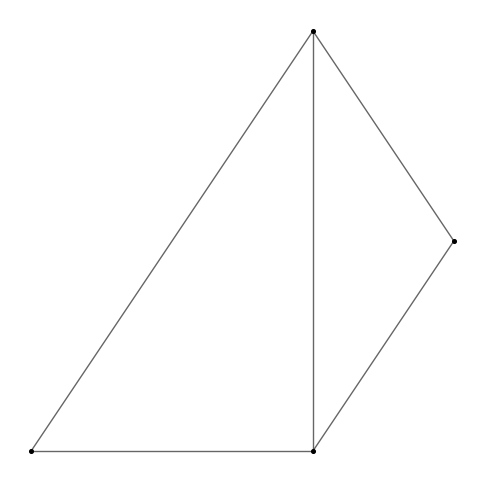

Harmonic Projection Matrix:
[[ 0.61075746 -0.61075746  0.44907446  0.161683   -0.161683  ]
 [-0.04444466  0.04444466  0.54619788 -0.59064254  0.59064254]]


In [2]:
pts = np.array([(1,0), (0,1),  (0,-1), (-2, -1)])
SC = SimplicialComplex(pts, True)
all_edges = np.array([0,1,2,3,4])
edges_to_add = {1:set(all_edges)}
coord_pairs = [[tuple(SC.nodes[i]), tuple(SC.nodes[j]), (i,j)] for (i,j) in SC.edges]
SC.add_simplices(edges_to_add)
plt.figure(figsize=(6,6))
SC.plot()
plt.show()

print("Harmonic Projection Matrix:")
print(SC.H)

[0, 1, 3]


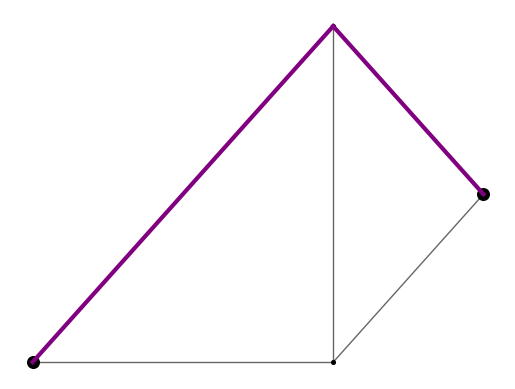

In [3]:
ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths([(1,0), (0,1), (-2,-1)], 1, 1, 0)
ref_path_class.plot_paths('purple', 'ref_path')

ref_path = ref_path_class.paths[0]
print(ref_path.nodes)

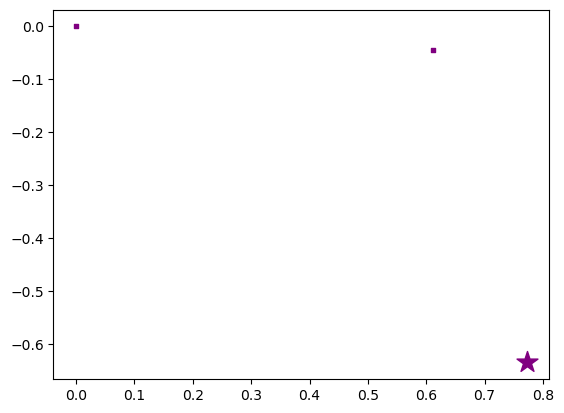

In [4]:
ref_path_class.plot_projections('purple', 'ref_path')

In [5]:
ref_path = ref_path_class.paths[0]
ref_proj = ref_path.edge_projections[-1]
print(f"Reference projection: {ref_proj}")

Reference projection: [ 0.77244045 -0.6350872 ]


# Guided Dijkstra Algorithm via Path Projection

In [6]:
#alpha_star = (np.sqrt(2)-1)/3 # computed this alpha by hand (optimal path transition)
alpha_star = (np.sqrt(2)-1)/2
eps = 0.1
alpha = alpha_star + eps

path, cost = augmented_dijkstra(SC, 0, 3, ref_proj, alpha)
path_proj = path.edge_projections[-1]
print(f"Path projection: {path_proj}")

Path projection: [ 0.77244045 -0.6350872 ]


# Complicated Example

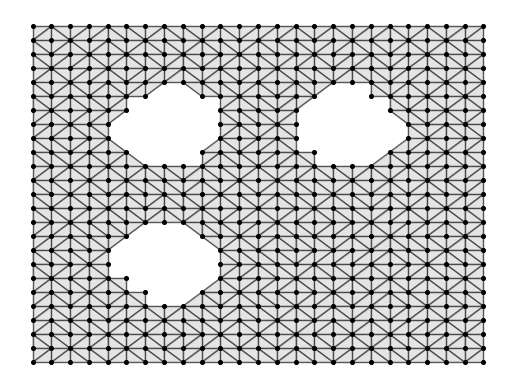

In [7]:
n_side, point_gen_mode = 25, 0
hole_locs = [(-0.4, -0.4), (0.4,0.4), (-0.4, 0.4)]#, (0.4, -0.4)]
r = 0.2

pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts, True)
all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r)
SC.plot()

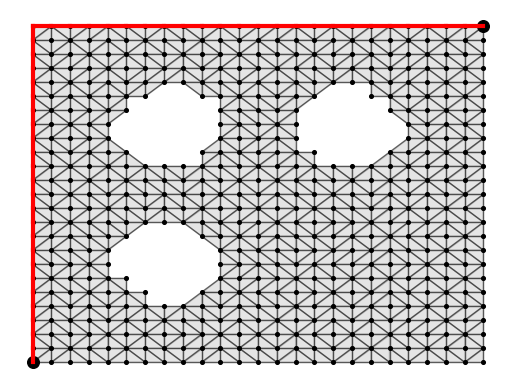

In [8]:
#coords = [(-1,-1), (-0.5, 0.25), (0.5, -0.25), (1,1)]
ref_path_coords = [(-1,-1), (-1,1), (1,1)]
num_paths, num_nodes = 1, 1

ref_path = Trajectory_Class(SC)
ref_path.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)

ref_path.plot_paths('red', 'ref')

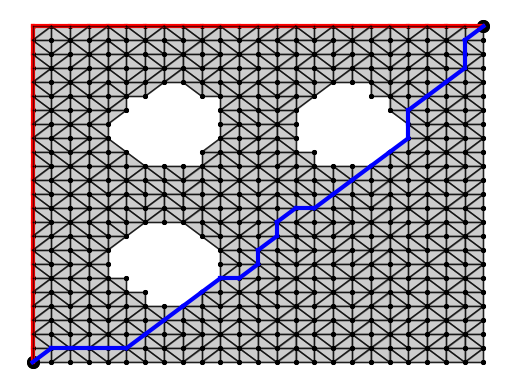

alpha = 0.0, final cost = 3.121320343559642
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [-0.61794692 -0.78810899  0.23496076]


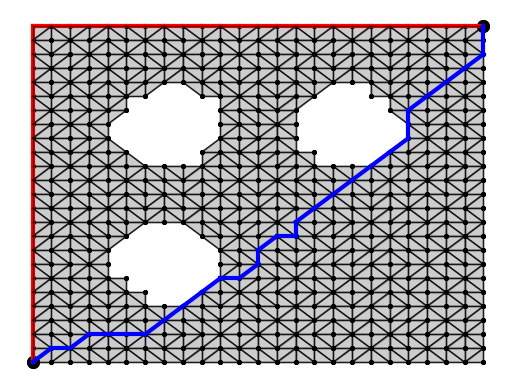

alpha = 0.001, final cost = 3.2371226822720858
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [-0.61794692 -0.78810899  0.23496076]


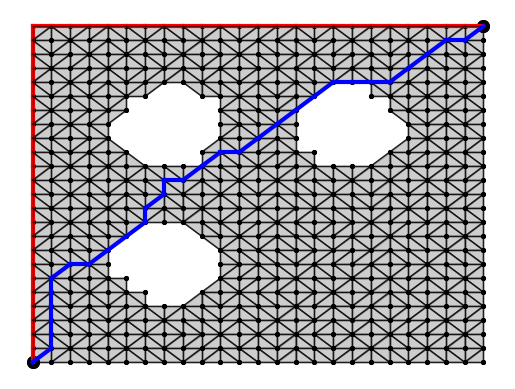

alpha = 0.002, final cost = 3.315954172126445
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [ 0.33832542  0.86813922 -0.98853016]


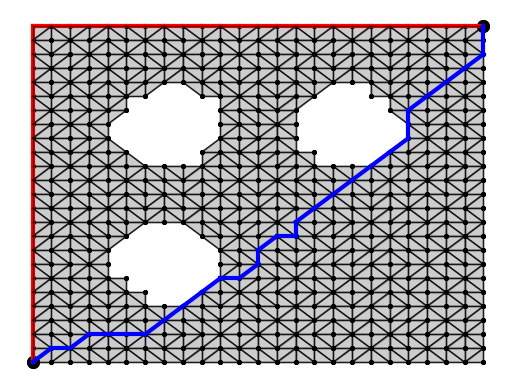

alpha = 0.003, final cost = 3.468727359696971
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [-0.61794692 -0.78810899  0.23496076]


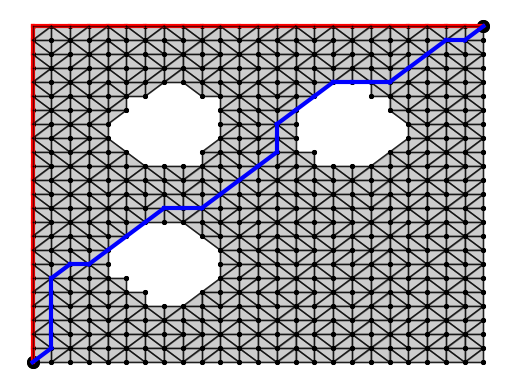

alpha = 0.004, final cost = 3.465897569668928
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [ 0.33832542  0.86813922 -0.98853016]


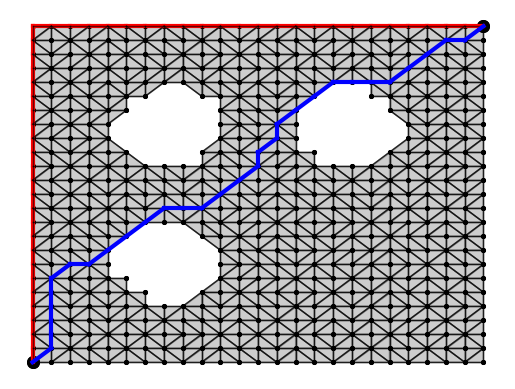

alpha = 0.005, final cost = 3.5398773765831426
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [ 0.33832542  0.86813922 -0.98853016]


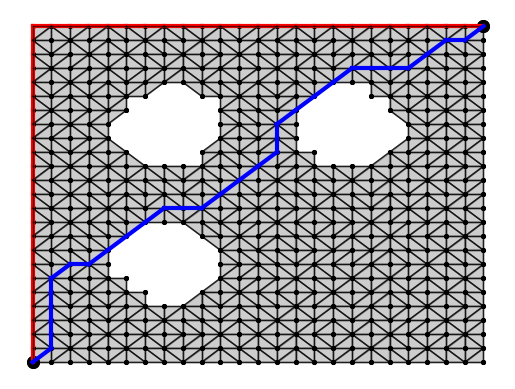

alpha = 0.006, final cost = 3.613932011039762
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [ 0.33832542  0.86813922 -0.98853016]


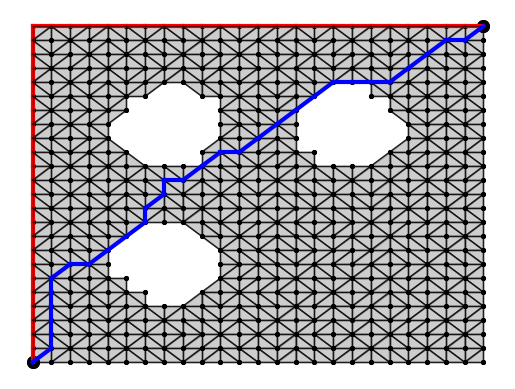

alpha = 0.007, final cost = 3.6804999023711784
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [ 0.33832542  0.86813922 -0.98853016]


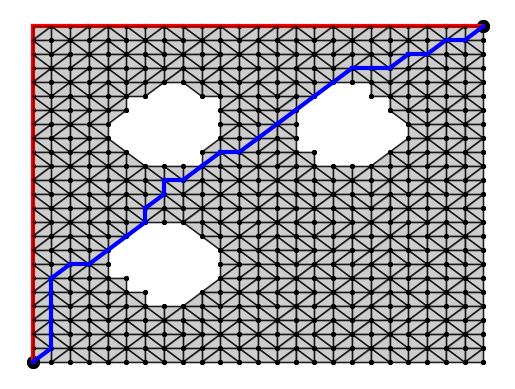

alpha = 0.008, final cost = 3.7536570692830735
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [ 0.33832542  0.86813922 -0.98853016]


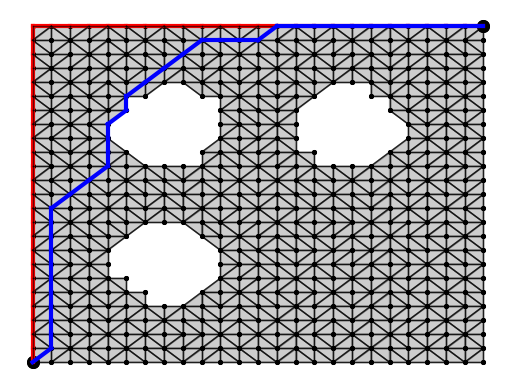

alpha = 0.009000000000000001, final cost = 3.8055364588050717
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


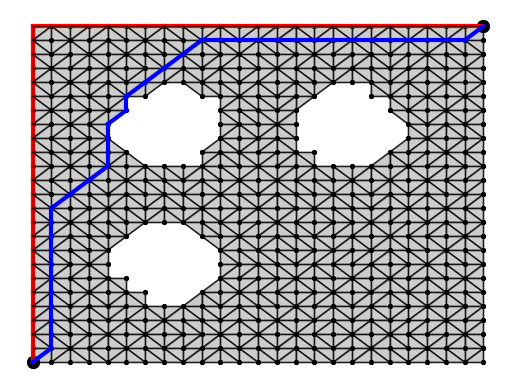

alpha = 0.01, final cost = 3.837885429634227
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


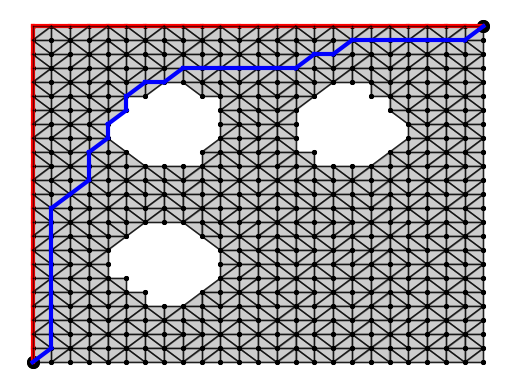

alpha = 0.011, final cost = 3.8706977605585515
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


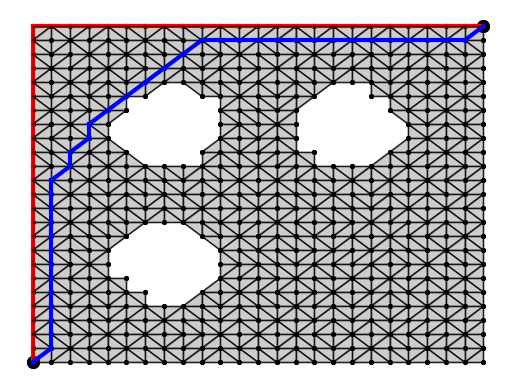

alpha = 0.012, final cost = 3.899538052833628
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


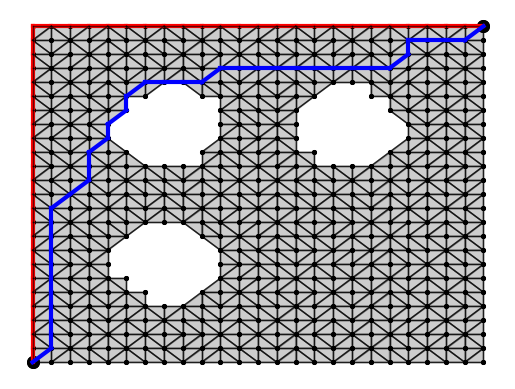

alpha = 0.013000000000000001, final cost = 3.984465405993913
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


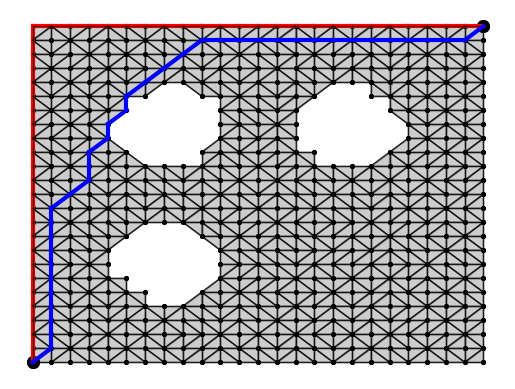

alpha = 0.014, final cost = 3.966835203163801
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


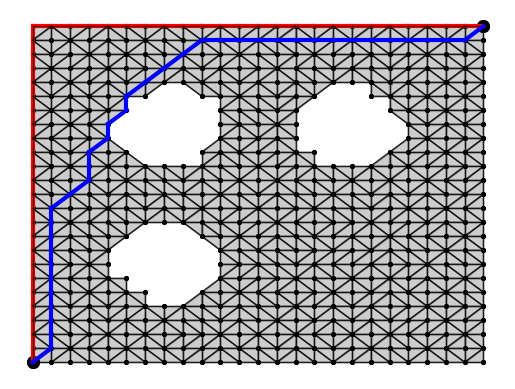

alpha = 0.015, final cost = 3.999537239141323
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


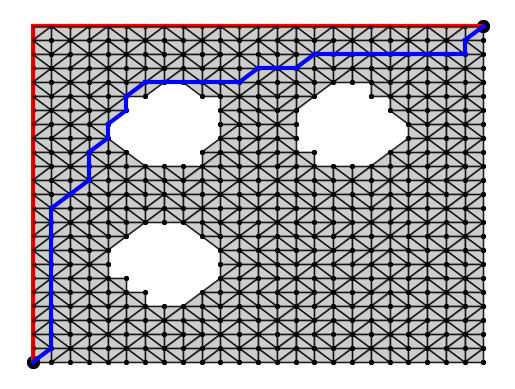

alpha = 0.016, final cost = 4.082807154131635
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


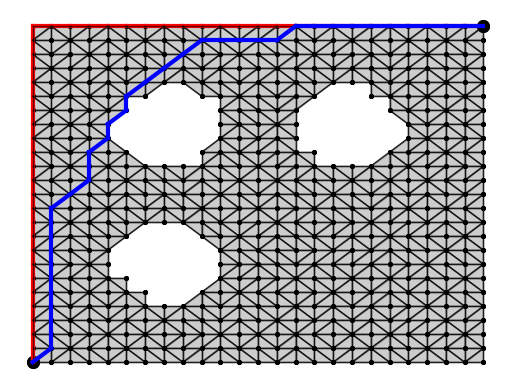

alpha = 0.017, final cost = 4.064547973114619
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


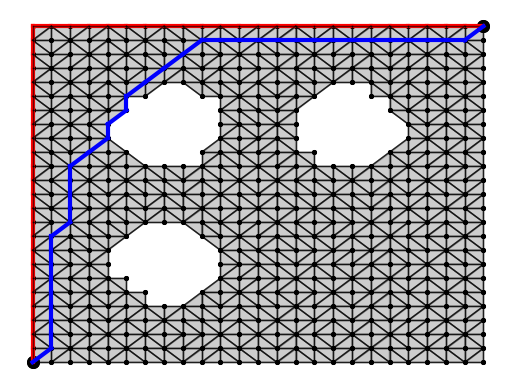

alpha = 0.018000000000000002, final cost = 4.0960706681935735
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


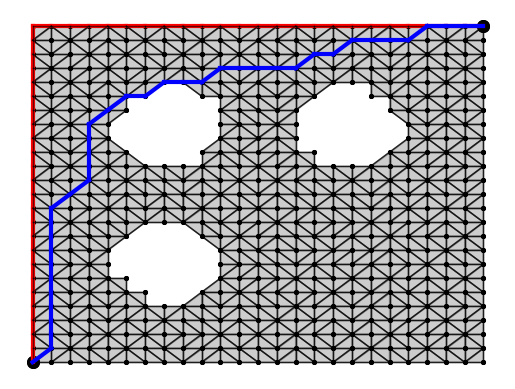

alpha = 0.019, final cost = 4.131824272481429
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


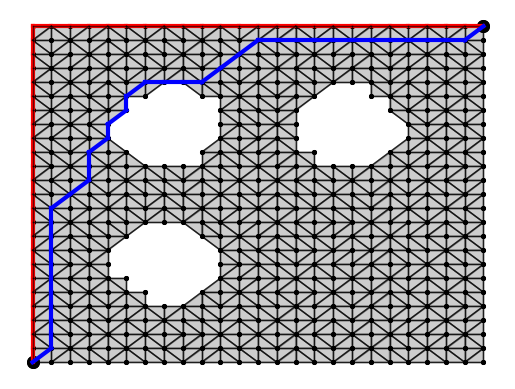

alpha = 0.02, final cost = 4.161971727917057
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


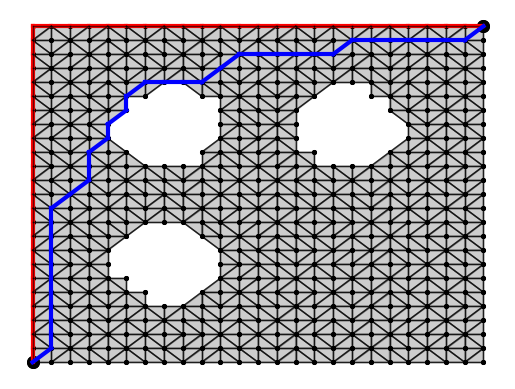

alpha = 0.021, final cost = 4.1956363664621135
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


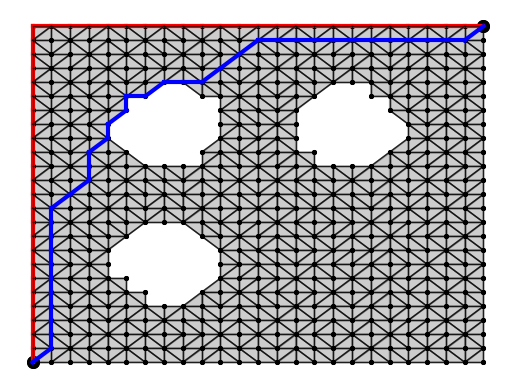

alpha = 0.022, final cost = 4.227144891613931
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


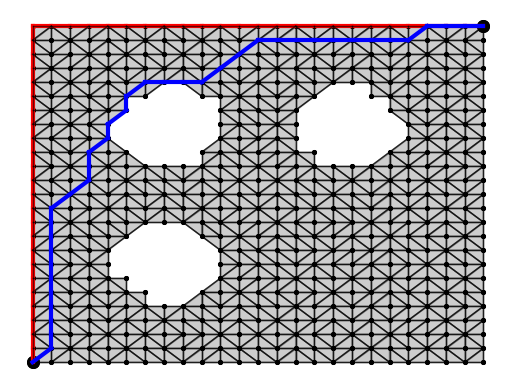

alpha = 0.023, final cost = 4.259515690068804
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


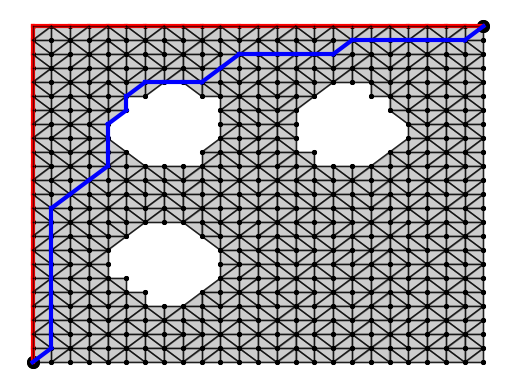

alpha = 0.024, final cost = 4.295834975254719
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


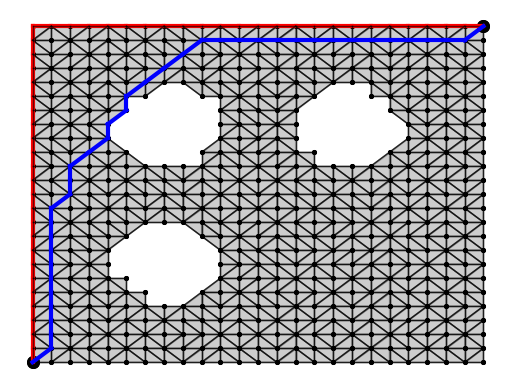

alpha = 0.025, final cost = 4.322387991240025
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


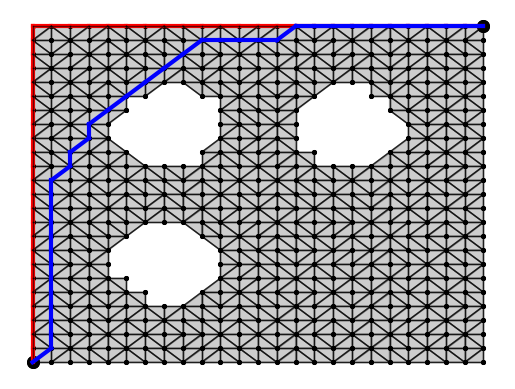

alpha = 0.026000000000000002, final cost = 4.352175544017296
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


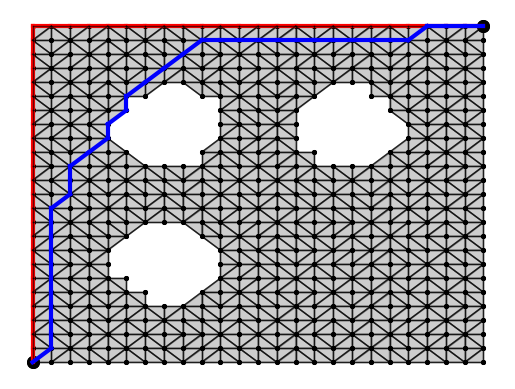

alpha = 0.027, final cost = 4.387260688107496
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


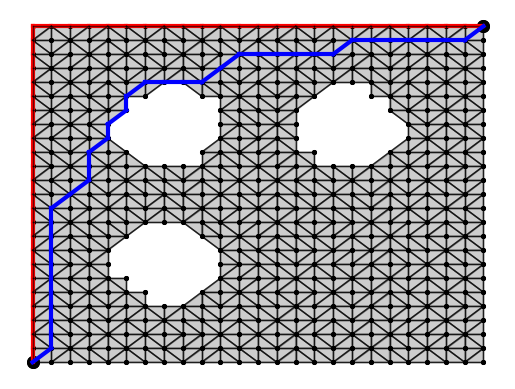

alpha = 0.028, final cost = 4.423566943512514
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


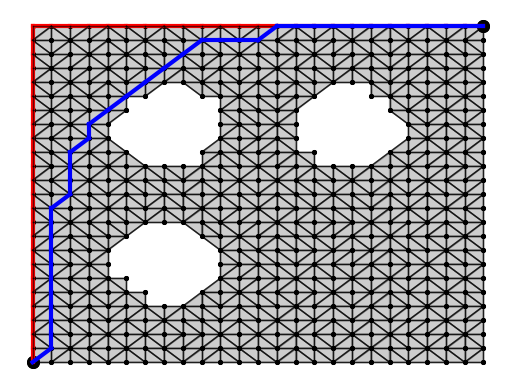

alpha = 0.029, final cost = 4.450945504398357
ref proj : [1.07026335 0.83224589 0.54843277], path proj : [1.07026335 0.83224589 0.54843277]


In [9]:
start, end = 0, len(SC.node_vec)-1
ref_path_proj = ref_path.paths[0].edge_projections[-1]
alphas = np.arange(0, 0.03, 1e-3)

for alpha in alphas:
    path, cost = augmented_dijkstra(SC, start, end, ref_path_proj, alpha, False)
    path_proj = path.edge_projections[-1]
    path_coords = [SC.nodes[v] for v in path.nodes]
    res_path = Trajectory_Class(SC)
    #res_path.generate_paths(path_coords, num_paths, num_nodes, 1e-1)
    #res_path.plot_paths('blue', f'alpha = {alpha}')
    class_coords = [ref_path_coords, path_coords]
    holder = Trajectory_Holder(SC, class_coords, 1, ['ref', 'res'], ['red', 'blue'], 1, 0)
    holder.plot_paths(True)
    print(f"alpha = {alpha}, final cost = {cost}")
    print(f"ref proj : {ref_path_proj}, path proj : {path_proj}")


# When Greedy fails

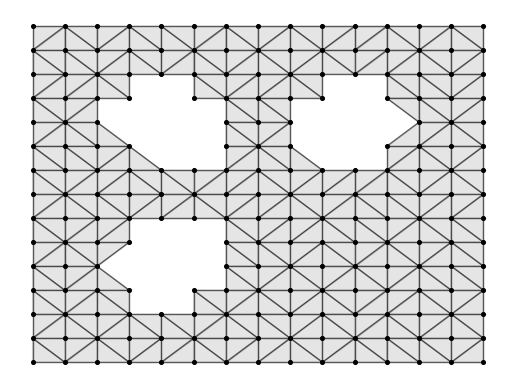

In [10]:
n_side, point_gen_mode = 15, 0
hole_locs = [(-0.4, -0.4), (0.4,0.4), (-0.4, 0.4)]#, (0.4, -0.4)]
r = 0.2

pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts, True)
all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r)
SC.plot()

ref_path_coords = [(-1,-1), (-1,1), (1,1)]
num_paths, num_nodes = 1, 1

ref_path = Trajectory_Class(SC)
ref_path.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)

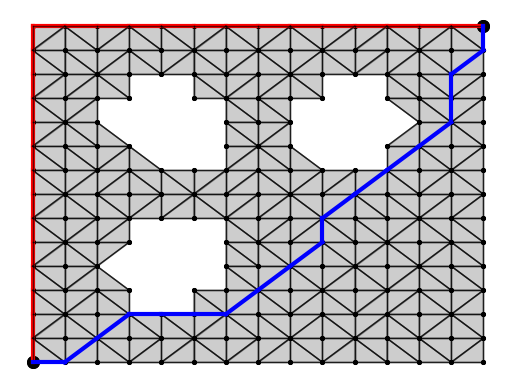

alpha = 0.0, final cost = 3.1631622319615635
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


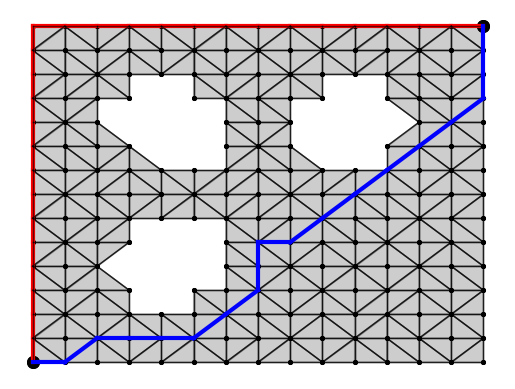

alpha = 0.001, final cost = 3.3257123774256163
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


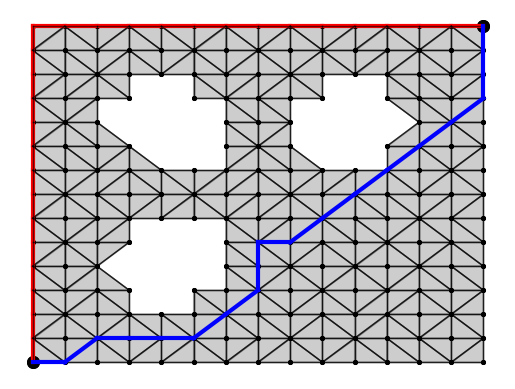

alpha = 0.002, final cost = 3.404578746085825
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


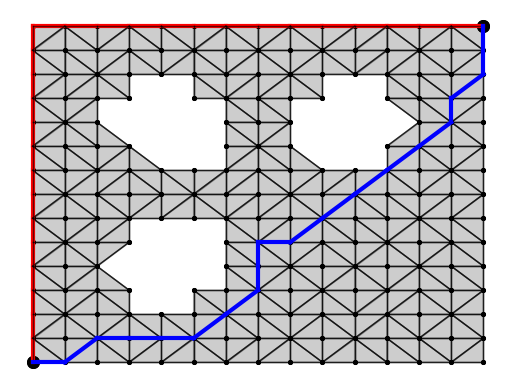

alpha = 0.003, final cost = 3.483938511145925
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


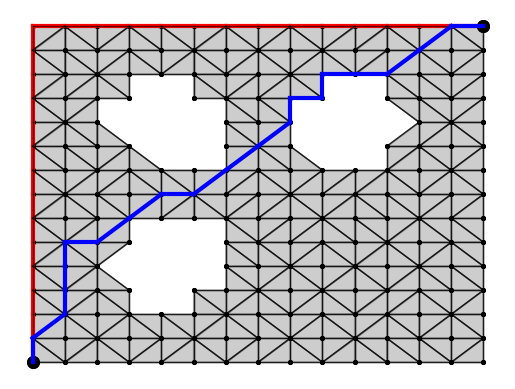

alpha = 0.004, final cost = 3.5442694386252294
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


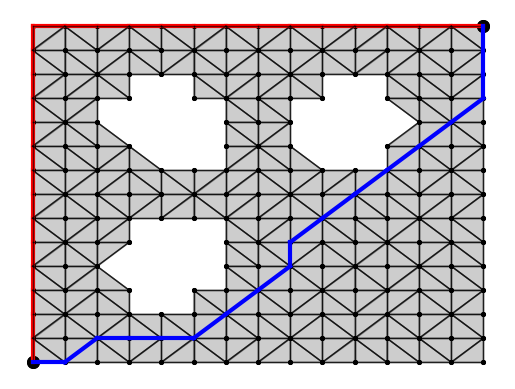

alpha = 0.005, final cost = 3.537195786297444
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


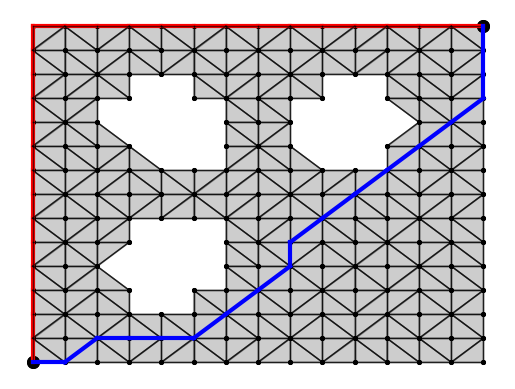

alpha = 0.006, final cost = 3.61200249716462
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


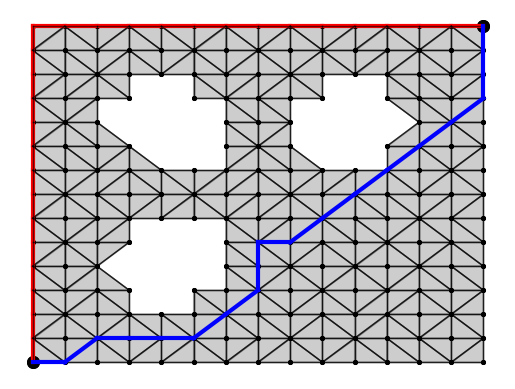

alpha = 0.007, final cost = 3.7989105893868698
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


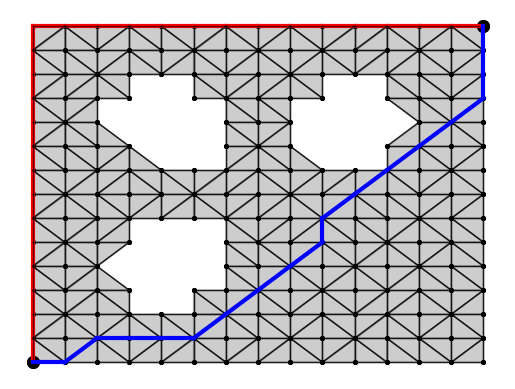

alpha = 0.008, final cost = 3.7614924159823215
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.30302958  0.56088294 -0.85627368]


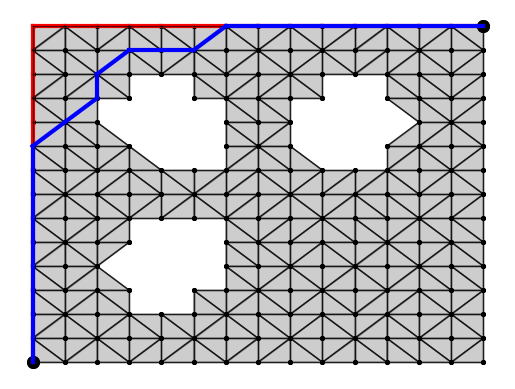

alpha = 0.009000000000000001, final cost = 3.8675834492913035
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


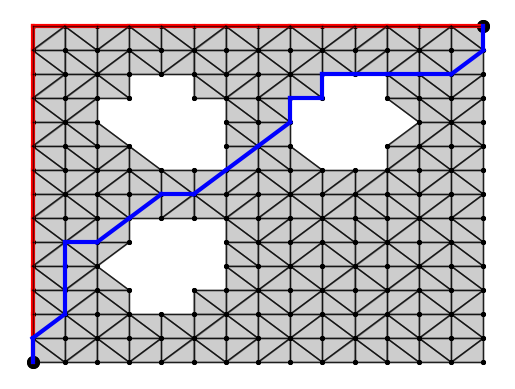

alpha = 0.01, final cost = 3.9809049251663873
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


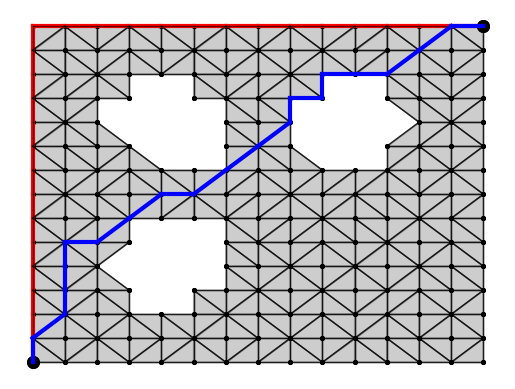

alpha = 0.011, final cost = 3.9183138314731907
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


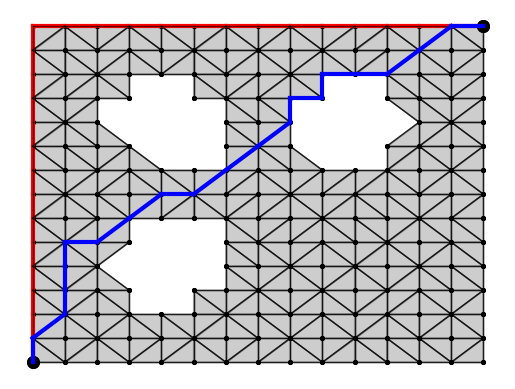

alpha = 0.012, final cost = 3.9717487447371855
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


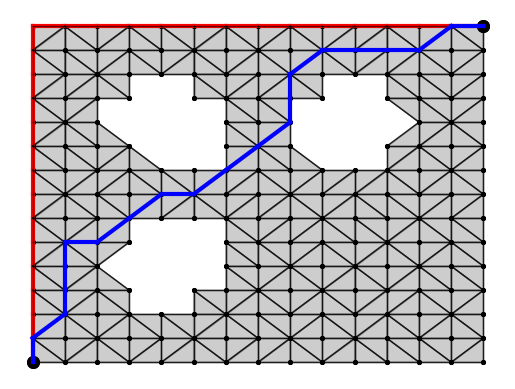

alpha = 0.013000000000000001, final cost = 4.02842460411177
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


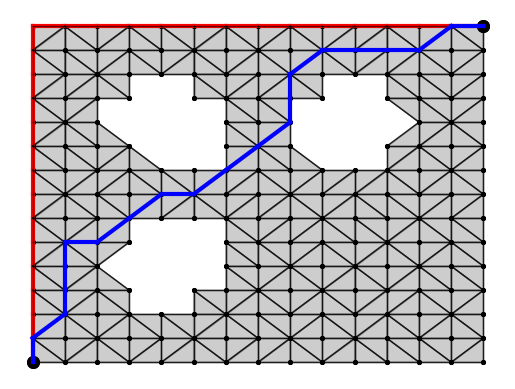

alpha = 0.014, final cost = 4.080519570049476
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


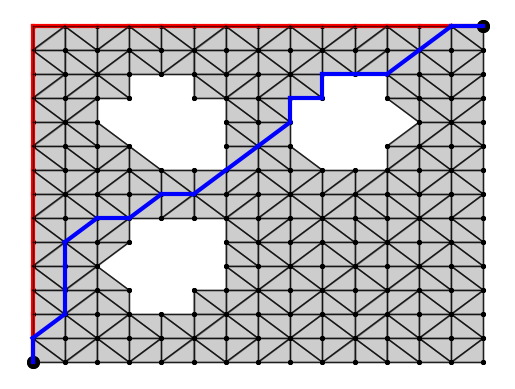

alpha = 0.015, final cost = 4.130741063856855
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


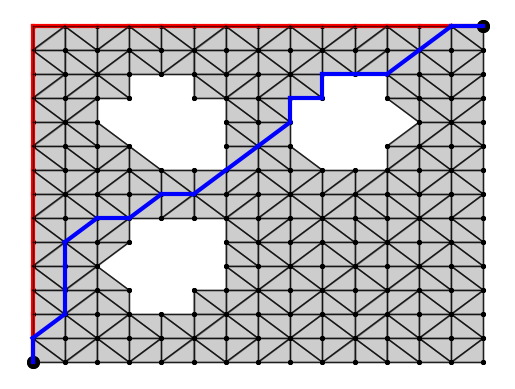

alpha = 0.016, final cost = 4.184088482409362
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


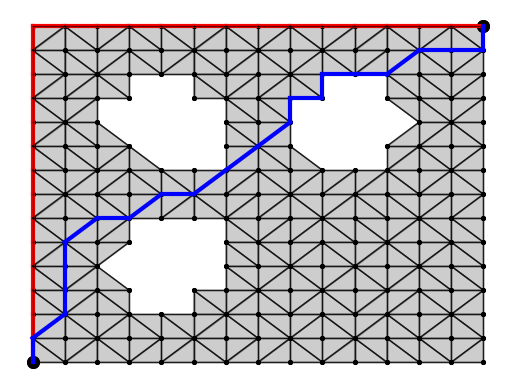

alpha = 0.017, final cost = 4.376109796577985
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


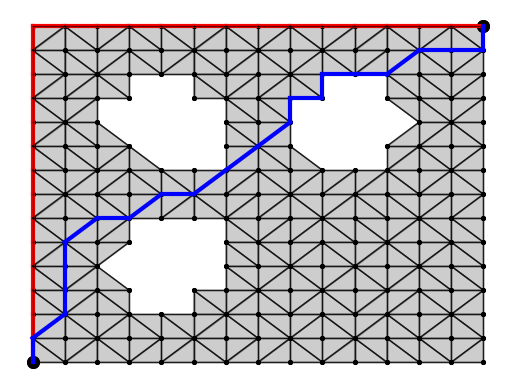

alpha = 0.018000000000000002, final cost = 4.432691928001803
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


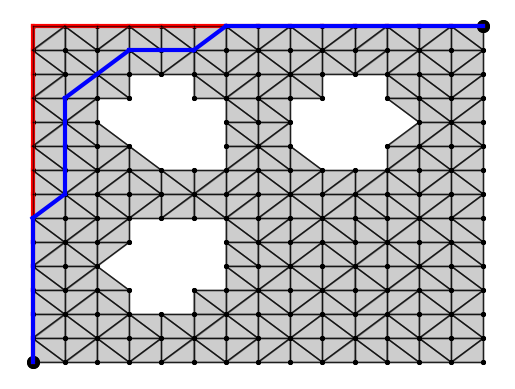

alpha = 0.019, final cost = 4.092174496323003
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


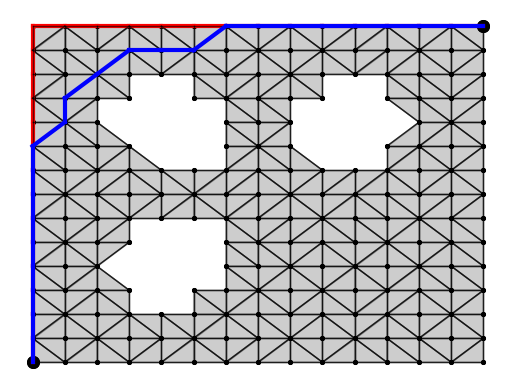

alpha = 0.02, final cost = 4.114329397519571
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


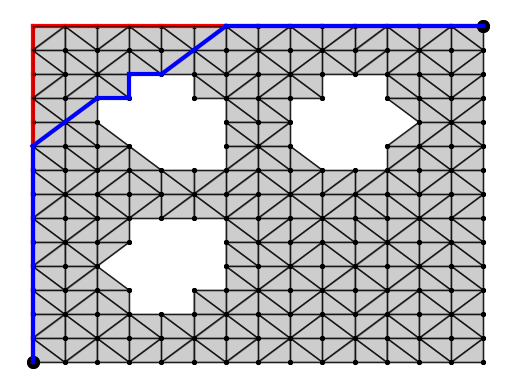

alpha = 0.021, final cost = 4.138742608557026
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


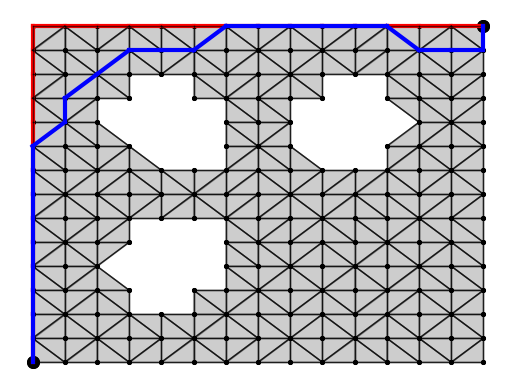

alpha = 0.022, final cost = 4.361195321102672
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


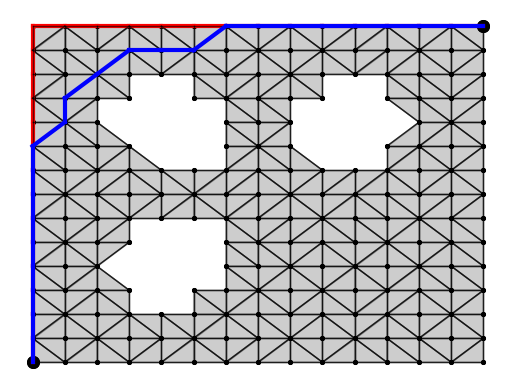

alpha = 0.023, final cost = 4.181689073229813
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


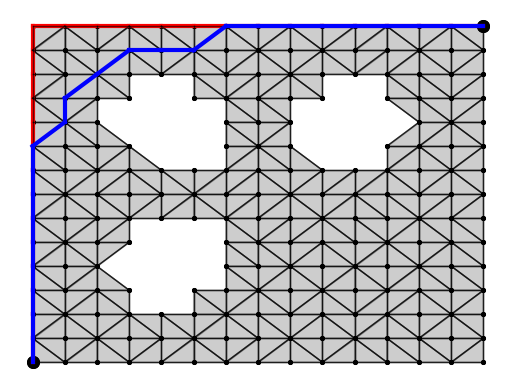

alpha = 0.024, final cost = 4.204142298466559
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


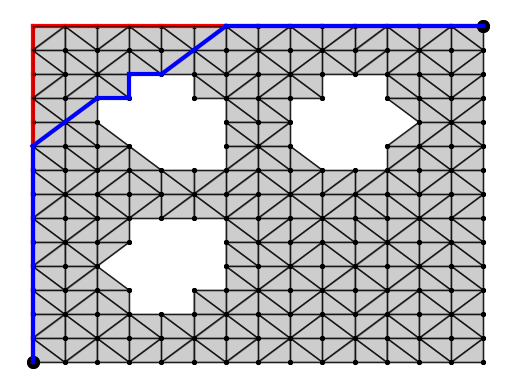

alpha = 0.025, final cost = 4.22885278698448
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


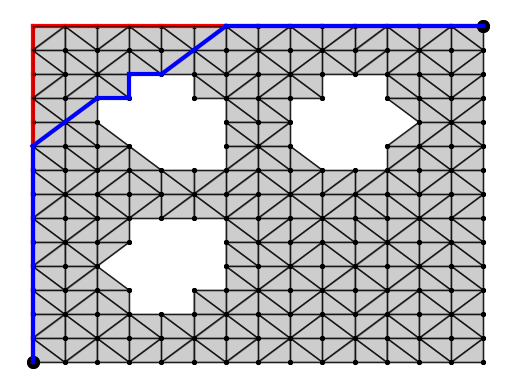

alpha = 0.026000000000000002, final cost = 4.2513963027524735
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [ 0.46139719 -1.18736247  0.83770558]


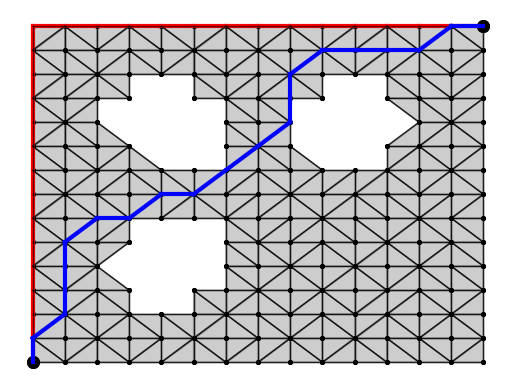

alpha = 0.027, final cost = 4.774576298428093
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


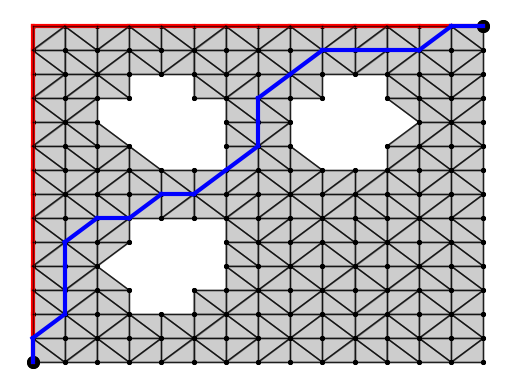

alpha = 0.028, final cost = 4.83123800435456
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


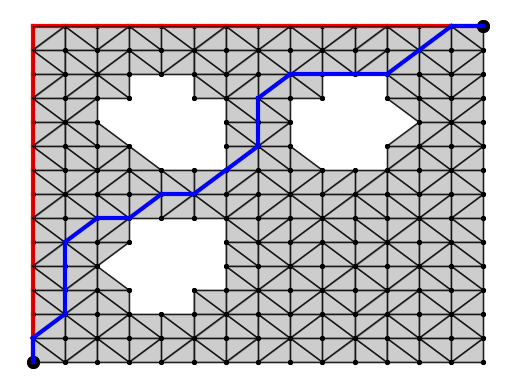

alpha = 0.029, final cost = 4.8829864946129735
ref proj : [ 0.46139719 -1.18736247  0.83770558], path proj : [-1.09802956 -0.29110587  0.82566282]


In [11]:
start, end = 0, len(SC.node_vec)-1
ref_path_proj = ref_path.paths[0].edge_projections[-1]
alphas = np.arange(0, 0.03, 1e-3)

for alpha in alphas:
    path, cost = augmented_dijkstra(SC, start, end, ref_path_proj, alpha, False)
    path_proj = path.edge_projections[-1]
    path_coords = [SC.nodes[v] for v in path.nodes]
    res_path = Trajectory_Class(SC)
    #res_path.generate_paths(path_coords, num_paths, num_nodes, 1e-1)
    #res_path.plot_paths('blue', f'alpha = {alpha}')
    class_coords = [ref_path_coords, path_coords]
    holder = Trajectory_Holder(SC, class_coords, 1, ['ref', 'res'], ['red', 'blue'], 1, 0)
    holder.plot_paths(True)
    print(f"alpha = {alpha}, final cost = {cost}")
    print(f"ref proj : {ref_path_proj}, path proj : {path_proj}")